In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from urllib.request import urlretrieve
from sklearn.decomposition import PCA
import os
from sklearn.mixture import GaussianMixture
%matplotlib inline
sns.set()

In [115]:
#obtaining the data from the seattle website and transforming the date column into datetime.
url = "https://data.seattle.gov/resource/65db-xm6k.csv?$limit=102900"

def get_data(filename='fremont_bike.csv', url=url):
    if not os.path.exists(filename):
        urlretrieve(url, filename)
    data = pd.read_csv(filename, index_col='date', parse_dates=True)
    return data
data= get_data()

In [43]:
data.head()

,fremont_bridge,fremont_bridge_nb,fremont_bridge_sb
date,,,
2024-06-30 23:00:00,18.0,9.0,9.0
2024-06-30 22:00:00,32.0,10.0,22.0
2024-06-30 21:00:00,52.0,13.0,39.0
2024-06-30 20:00:00,121.0,37.0,84.0
2024-06-30 19:00:00,125.0,57.0,68.0


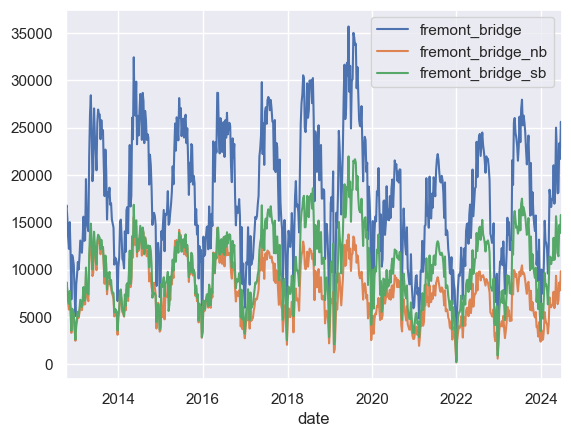

In [36]:
#ploting the data based on the weekly sums.
data.resample('w').sum().plot();

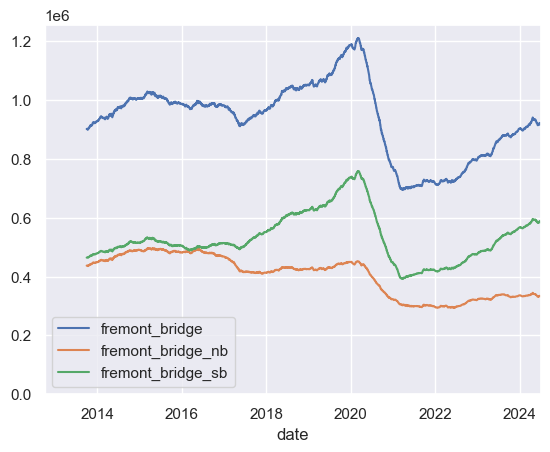

In [116]:
#ploting the data based on the daily sum.
data.resample('D').sum().rolling(365).sum().plot();
plt.ylim(0, None);

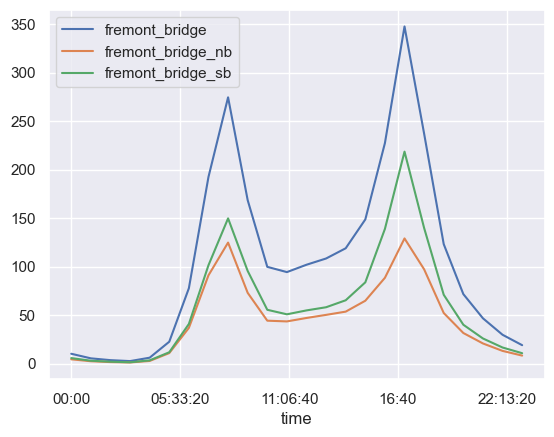

In [117]:
#plotting the data based on the mean value of each time throughout the years. using the groupby function to the data by the time.

data.groupby(data.index.time).mean().plot();

In [128]:
#pivoting the Total data 'fremont_bridge' by the date and the time where the index represents the time and the columns represents the dates.
#So wee can see the number of commuters in each hour for every date.
pivot = data.pivot_table('fremont_bridge', index=data.index.time, columns=data.index.date, dropna=False)

In [130]:
pivot.iloc[13:17, :5]

,2012-10-02,2012-10-03,2012-10-04,2012-10-05,2012-10-06
13:00:00,55.0,90.0,126.0,112.0,177.0
14:00:00,130.0,128.0,119.0,125.0,203.0
15:00:00,152.0,164.0,147.0,164.0,211.0
16:00:00,278.0,315.0,275.0,310.0,183.0


In [127]:
data.tail()

,fremont_bridge,fremont_bridge_nb,fremont_bridge_sb
date,,,
2012-10-02 17:00:00,563.0,393.0,170.0
2012-10-02 16:00:00,278.0,167.0,111.0
2012-10-02 15:00:00,152.0,81.0,71.0
2012-10-02 14:00:00,130.0,55.0,75.0
2012-10-02 13:00:00,55.0,7.0,48.0


<Figure size 1600x800 with 0 Axes>

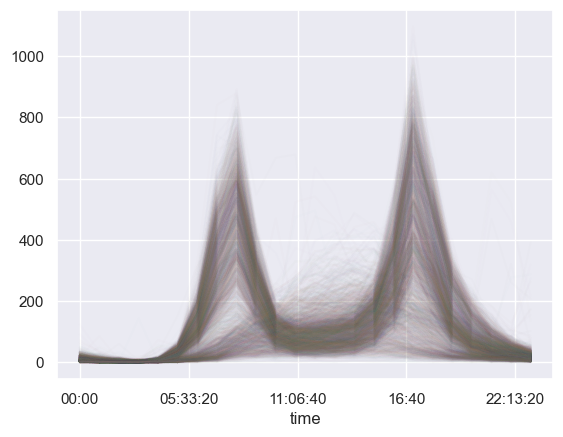

In [114]:
#plotting the pivot table data.
pivot.iloc[::,100:3000].plot(legend=False, alpha=0.01);

In [ ]:
#we can see two trends around the early morning and evening wich indicates that peopol use bikes to commute. 
#And another less strong trend in the middle of the day wich may represent the weekends.

In [ ]:
#using PCA analysis to analyse the data.

In [53]:
#fitting the pivot table data into the PCA.
x = pivot.fillna(0).T.values
pca = PCA(2).fit_transform(x)

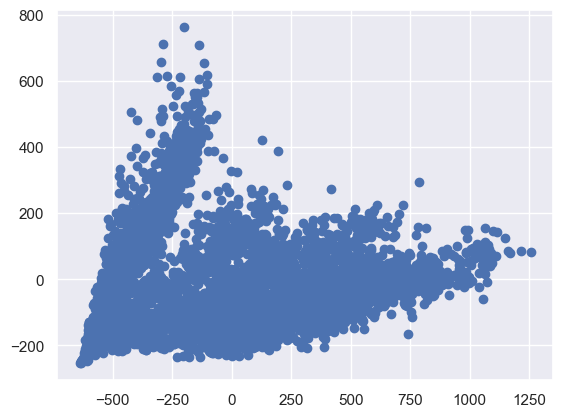

In [63]:
#pltting the results of the pca.
plt.scatter(pca[: ,0], pca[:, 1]);

In [ ]:
#there appear to be two clusters in the data, wich are probably the weekend vs the work days.

In [79]:
#clustering the data into two clusters and labeling them 0, 1 
gmm = GaussianMixture(2)
gmm.fit(x)
labels = gmm.predict(x)

In [80]:
labels

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

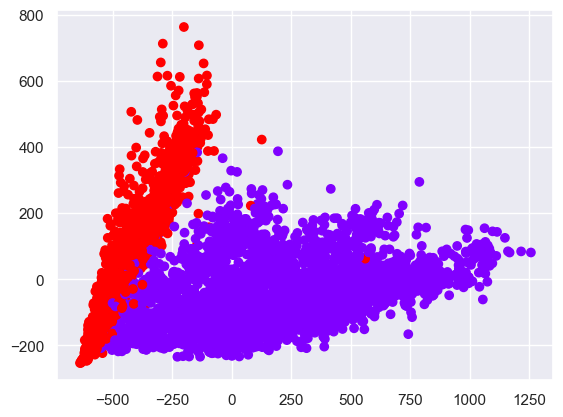

In [82]:
#using the labels of the clusters to seperate the two clusters in the pca results plot by coloring each cluster in a different color.
plt.scatter(pca[:, 0], pca[:, 1], c=labels, cmap='rainbow');

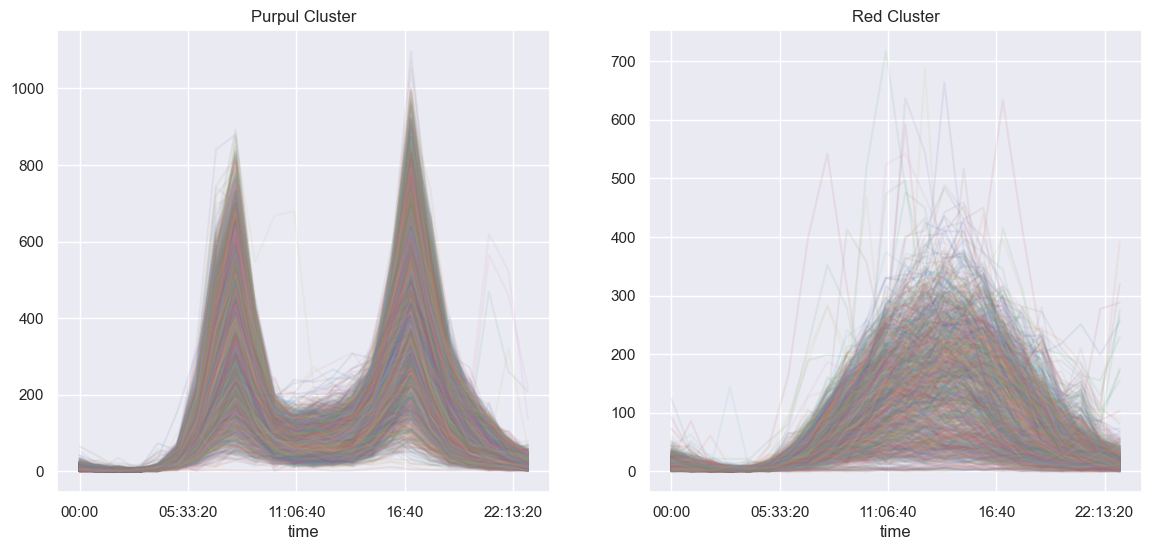

In [110]:
#ploting the the tow differnt clusters seperatly.
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
pivot.T[labels==0].T.plot(alpha=0.1, legend=False, ax=ax[0]);
pivot.T[labels==1].T.plot(alpha=0.1, legend=False, ax=ax[1]);
ax[0].set_title('Purpul Cluster');
ax[1].set_title('Red Cluster');

In [131]:
#we can see the difference between the clusters and that the purple cluster represents the work days and the red one the weekends.
#wich means that people do really use bikes to commute on work days and use them in the middle of the day on the weekends.

In [ ]:
#comparing with days of the week

In [89]:
dayofweek = pd.DatetimeIndex(pivot.columns).dayofweek

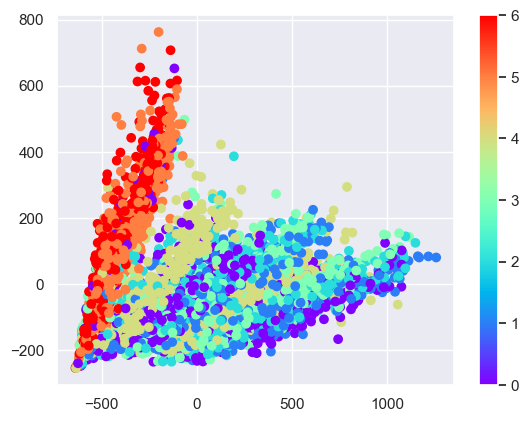

In [91]:
plt.scatter(pca[:, 0], pca[:, 1], c=dayofweek, cmap='rainbow');
plt.colorbar();

In [132]:
#days from 0 - 4 represents work days and are shown in the larger cluster and days 5-6 are the weekends.
#there appear to be some outliers in the days between the weekends and the commute days

In [108]:
#analyzing outliers
dates = pd.DatetimeIndex(pivot.columns)

In [133]:
#all the days that are non weekend that look like non commute days. or all the days of the work week in wich peopole didn't commute.
#and they appear to be hollydays or special days.
dates[(labels==1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-25', '2013-01-01',
               '2013-05-27', '2013-07-04', '2013-07-05', '2013-09-02',
               '2013-11-28', '2013-11-29',
               ...
               '2023-11-23', '2023-11-24', '2023-12-22', '2023-12-25',
               '2023-12-26', '2023-12-29', '2024-01-01', '2024-01-15',
               '2024-05-27', '2024-06-21'],
              dtype='datetime64[ns]', length=122, freq=None)

In [105]:
#and these are all the weekend days that look like to be commute days or in wich people commuted.
dates[(labels==0) & (dayofweek >= 5)]

DatetimeIndex(['2013-01-05', '2013-02-24', '2013-07-13', '2014-04-26',
               '2014-04-27', '2014-07-12', '2015-07-11', '2015-09-13',
               '2016-04-03', '2016-07-16', '2017-05-28', '2017-07-15',
               '2018-04-08', '2018-07-14', '2019-02-02', '2019-02-03',
               '2019-07-13', '2020-05-02', '2020-05-31', '2020-09-05',
               '2021-06-26', '2022-07-16', '2023-07-15', '2024-02-25',
               '2024-05-05'],
              dtype='datetime64[ns]', freq=None)

In [134]:
#there doesn't seem to be much times where peopol cummute on the weekends.